In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import cv2
import pickle
import os, time
import random
import numpy as np
import matplotlib.pyplot as plt
import collections as col

from params                    import get_params
from sklearn                  import preprocessing
from sklearn.cluster          import MiniBatchKMeans
from sklearn.decomposition    import PCA
from sklearn.preprocessing    import normalize, StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from keras.models             import Model
from keras.preprocessing      import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from PIL                      import Image, ImageOps



In [4]:
base_model = VGG19(weights='imagenet') 
model = Model(input=base_model.input, output=base_model.get_layer('fc2').output)

In [5]:
params = get_params() 
sys.path.insert(0,params['src'])

In [6]:
dir_principal = os.getcwd() #obtenim la direcció principal on està ubicat el projecte
llistatest=[] #generem les llistes necessàries per generar els descriptors i el diccionari dels descriptors a continuació
llistatestf=[]
desc_test = []
dic_desc_test = {}
dtest = []
j = 0 #inicialitzem a zero la variable que ens servirà de contador per recórrer les posicions de cada imatge en les llistes dins del for
for (path,dirs,files) in os.walk(str(dir_principal)+'/TB2017/test/images'):# recorrem el directori de les imatges de test
 break #amb aquest for hem obtingut la llista d'strings dels noms de les imatges
for i in files:# per cada nom de fitxer, seleccionem una imatge i l'entrem a les llistes
    img_path = str(dir_principal)+'/TB2017/test/images/'+i
    img = image.load_img(img_path,target_size=(224,224))
    llistatest.append(img)
    llistatestf.append(np.expand_dims(image.img_to_array(img), axis=0)) 
    llistatestf[j] = preprocess_input(llistatestf[j])
    desc_test.append(model.predict(llistatestf[j])) 
    dic_desc_test[i] = model.predict(llistatestf[j]) # entrem dins del diccionari de descriptors, cada id d'imatge amb el seu descriptor corresponent 
    desc_test.append(model.predict(llistatestf[j]))
    dtest.append(np.vstack(desc_test[j]))
    j = j+1

In [7]:
dir_principal = os.getcwd()#obtenim la direcció principal on està ubicat el projecte
llistatrain=[] #generem les llistes necessàries per generar els descriptors i el diccionari dels descriptors a continuació
llistatrainf=[]
desc_train = []
dtrain = []
dic_desc_train= {}
j = 0 #inicialitzem a zero la variable que ens servirà de contador per recórrer les posicions de cada imatge en les llistes dins del for
for (path,dirs,files) in os.walk(str(dir_principal)+'/TB2017/train/images'):# recorrem el directori de les imatges de train
 break#amb aquest for hem obtingut la llista d'strings dels noms de les imatges
for i in files:# per cada nom de fitxer, seleccionem una imatge i l'entrem a les llistes
    img_path = str(dir_principal)+'/TB2017/train/images/'+i
    img = image.load_img(img_path,target_size=(224,224))
    llistatrain.append(img)
    llistatrainf.append(np.expand_dims(image.img_to_array(img), axis=0)) 
    llistatrainf[j] = preprocess_input(llistatrainf[j])
    dic_desc_train[i] = model.predict(llistatrainf[j]) # entrem dins del diccionari de descriptors, cada id d'imatge amb el seu descriptor corresponent
    desc_train.append(model.predict(llistatrainf[j]))
    dtrain.append(np.vstack(desc_train[j]))
    j = j+1


In [8]:
dir_principal = os.getcwd()#obtenim la direcció principal on està ubicat el projecte
llistaval=[] #generem les llistes necessàries per generar els descriptors i el diccionari dels descriptors a continuació
llistavalf=[]
desc_val = []
dval = []
dic_desc_val = {}
j = 0 #inicialitzem a zero la variable que ens servirà de contador per recórrer les posicions de cada imatge en les llistes dins del for
for (path,dirs,files) in os.walk(str(dir_principal)+'/TB2017/val/images'):# recorrem el directori de les imatges de val
 break#amb aquest for hem obtingut la llista d'strings dels noms de les imatges
for i in files:# per cada nom de fitxer, seleccionem una imatge i l'entrem a les llistes
    img_path = str(dir_principal)+'/TB2017/val/images/'+i
    img = image.load_img(img_path,target_size=(224,224))
    llistaval.append(img)
    llistavalf.append(np.expand_dims(image.img_to_array(img), axis=0)) 
    llistavalf[j] = preprocess_input(llistavalf[j])
    dic_desc_val[i] = model.predict(llistavalf[j])  # entrem dins del diccionari de descriptors, cada id d'imatge amb el seu descriptor corresponent
    desc_val.append(model.predict(llistavalf[j]))
    dval.append(np.vstack(desc_val[j]))
    j = j+1

In [9]:
desc_test = np.asarray(dtest)
desc_train = np.asarray(dtrain)
desc_val = np.asarray(dval)

In [10]:
#descriptor a picke (test)
pickle.dump(desc_test,open("testdef.pkl","wb"))

In [11]:
#descriptor a picke (train)
pickle.dump(desc_train,open("traindef.pkl","wb"))

In [12]:
#descriptor a picke (val)
pickle.dump(desc_val,open("valdef.pkl","wb"))

In [13]:
#fem els'.p' 
pickle.dump(llistatest,open("testp.p","wb"))
pickle.dump(llistatrain,open("trainp.p","wb"))
pickle.dump(llistaval,open("valp.p","wb"))

In [14]:
#obrim els pickles;
test_ap = pickle.load(open("testdef.pkl","rb"))
train_ap = pickle.load(open("traindef.pkl","rb"))
val_ap = pickle.load(open("valdef.pkl","rb"))
print (test_ap)

[[[0.7445525  1.0354306  0.         ... 0.7210749  0.         0.        ]]

 [[0.7445525  1.0354306  0.         ... 0.7210749  0.         0.        ]]

 [[3.1951184  4.5511956  0.         ... 0.748582   0.         0.        ]]

 ...

 [[0.         1.743796   0.04691339 ... 0.         0.         0.6300606 ]]

 [[0.         1.743796   0.04691339 ... 0.         0.         0.6300606 ]]

 [[3.4429512  0.         0.         ... 1.4733381  0.         0.        ]]]


In [15]:
test_ap.shape, train_ap.shape, val_ap.shape

((717, 1, 4096), (1194, 1, 4096), (477, 1, 4096))

In [16]:
# fem els reshapes
train_ap = np.reshape(train_ap,(1194,4096))
val_ap = np.reshape(val_ap,(477 ,4096))
val_ap.shape, train_ap.shape


((477, 4096), (1194, 4096))

In [17]:
# normalitzem
val_n = preprocessing.normalize(val_ap, norm = 'l2')
train_n = preprocessing.normalize(train_ap, norm = 'l2')
val_n.shape, train_n.shape

((477, 4096), (1194, 4096))

In [18]:
#transposem les matrius
train_n = train_n.T

In [19]:
#apliquem la operació matmul per detectar simil·lituds
simil = np.matmul(val_n, train_n, out = None)
simil.shape

(477, 1194)

In [20]:
ranks = np.argsort(simil, axis = 1)[:,::-1]
ranks.shape
#rank2 = 

(477, 1194)

In [21]:
x_val_image = []
x_train_image = []

In [22]:
#obtenim els pickles .p
trainpf =pickle.load(open("trainp.p","rb")) 
valpf =pickle.load(open("valp.p","rb")) 

In [23]:
for ia in range(477):
    x_val_image.append(np.asarray(valpf[ia])) 

In [24]:
for ib in range(1194):
    x_train_image.append(np.asarray(trainpf[ib]))

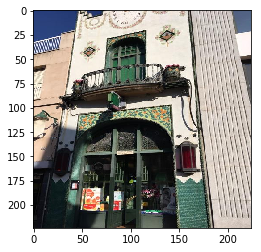

In [25]:
plt.imshow(x_val_image[15])


In [183]:
dv = '/home/jupyter/Projecte/TB2017/val/annotation.txt'
dt = '/home/jupyter/Projecte/TB2017/train/annotation.txt'

In [184]:
# fem el diccionari(id-nom) TRAIN
dic2train = {}
myFile = open(dt,'r')
for line in myFile:
    line2 = line.split()
    class1 = line2[0]
    gra = line2[1]
    dic2train[class1] = gra

In [185]:
# fem el diccionari(id-nom) VAL
dic2val = {}
myFile = open(dv,'r')
for line in myFile:
    line2 = line.split()
    class1 = line2[0]
    gra = line2[1]
    dic2val[class1] = gra

In [186]:
dic3_val = {} #Declaració del 3r diccionari (relacionarà cada etiqueta amb la llista de descriptors)
#generem una llista per cada nom ;
for  id,nom in dic2val.items():
    llista = []
    dic3_val[nom] = llista 

In [187]:
dic3_train = {} #Declaració del 3r diccionari (relacionarà cada etiqueta amb la llista de descriptors)
#generem una llista per cada nom ;
for id,nom in dic2train.items():
    llista = []
    dic3_train[nom] = llista 

In [188]:
# en aquest for entrarem la llista de descriptors a cada nom o label:(LABEL)
for id1, desc in dic_desc_val.items():
    id1 = id1[:10]
    if id1 in dic2val:
        dic3_val[dic2val[id1]].append(desc)

In [189]:
# en aquest for entrarem la llista de descriptors a cada nom o label: (TRAIN)
for id1, desc in dic_desc_train.items():
    id1 = id1[:10]
    if id1 in dic2train:
        dic3_train[dic2train[id1]].append(desc)

In [190]:
len(dic3_val['dona_treballadora']) #comprovem que a dona_treballadora, per exemple, hi ha 29 descriptors(VAL)

29

In [191]:
len(dic3_train['dona_treballadora']) #comprovem que a dona_treballadora, per exemple, hi ha 29 descriptors(TRAIN)

74

In [192]:
h,w = (224,224)
new_image = Image.new('RGB', (h*10,h*10))

In [193]:
#offset = 10
#for m in range (15):
#    ranks_m = ranks[m*(offset+1),:]
#    for t in range (10):
 #       ni = Image.fromarray(x_train_image[ranks_m[t]])
  #      new_image.paste(ni,(h*(1+t),w*m))
   #     ima_m = Image.fromarray(x_val_image[m*(offset+1)])
    #    ima_m = ImageOps.expand(ima_m,border=10, fill= 'green')
     #   new_image.paste(ima_m, (0,w*m))


In [198]:
offset = 15
for m in range (10):
    ranks_m = ranks[m*(offset+1),:]  #agafa tots els valors d'una fila i el posa en una posicio de ranks_m
    for t in range (10):
        ni = Image.fromarray(x_train_image[ranks_m[t]])
        descni = desc_train[ranks_m[t]]
        ima_m = Image.fromarray(x_val_image[m*(offset+1)])
        
        for id1, val1 in dic2train.items():
            id1 = id1[:10]
            if np.array_equal(val1,descni):
                nomni = dic2train[id1]
        for id2, val2 in dic2val.items():
            id2 = id2[:10]
            if np.array_equal(val2, descm):
                nomm = dic2val[id2]
                
        if nomni==nomm:
            ni = ImageOps.expand(ni,border=15, fill= 'green')
        elif nom!=nomni:
            if nomni == 'desconegut':
                ni = ImageOps.expand(ni, border=15, fill= 'red')
            else:
                ni = ImageOps.expand(ni,border=15, fill= 'red')
            
        ima_m = ImageOps.expand(ima_m,border=15, fill= 'yellow')
        new_image.paste(ima_m,(0,w*m))
        
       
        new_image.paste(ni,(h*(1+t),w*m))

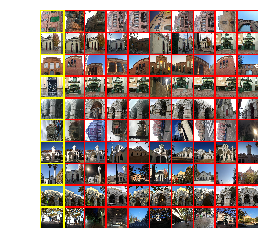

In [199]:
plt.imshow(new_image)
plt.axis('off')
plt.show()